In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
tickers_df = pd.read_csv('../daily_market_data/all_tickers.csv').groupby(by=['Ticker'])

In [18]:
aapl = tickers_df.get_group('AAPL')

In [5]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day', '5_SMA', '5_EMA', '20_SMA', '20_EMA', '50_SMA', '50_EMA',
       '200_SMA', '200_EMA', 'Cross', 'MACD', 'Stochastic_Oscillator',
       'Ticker'],
      dtype='object')

In [19]:
aapl['Date'] = pd.to_datetime(aapl[['Year', 'Month', 'Day']]).dt.date

/usr/local/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1248: RuntimeWarning: invalid value encountered in remainder
  carg / 10000, carg / 100 % 100, carg % 100
/var/folders/rz/znvx90ld6vnbmf6g3sf73y2w0000gn/T/ipykernel_1570/3323743485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['Date'] = pd.to_datetime(aapl[['Year', 'Month', 'Day']]).dt.date


In [20]:
aapl = aapl[(date(2023,1,1) <= aapl['Date']) & (aapl['Date'] <= date(2023,12,31))]

In [21]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,5_SMA,...,20_EMA,50_SMA,50_EMA,200_SMA,200_EMA,Cross,MACD,Stochastic_Oscillator,Ticker,Date
5787,130.279999,130.899994,124.169998,125.070000,124.048050,112117500,2023,1,3,128.135999,...,134.806346,142.709599,140.674427,151.433250,148.817472,-8.723651,-4.719808,0.000000,AAPL,2023-01-03
5788,126.889999,128.660004,125.080002,126.360001,125.327515,89113600,2023,1,4,127.401999,...,134.001932,142.291399,140.113077,151.245150,148.594015,-8.953751,-4.800807,0.071114,AAPL,2023-01-04
5789,127.129997,127.769997,124.760002,125.019997,123.998466,80962700,2023,1,5,127.197998,...,133.146510,141.802799,139.521192,151.043350,148.359448,-9.240551,-4.916453,0.000000,AAPL,2023-01-05
5790,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,2023,1,6,127.199997,...,132.810651,141.348399,139.132910,150.847350,148.172985,-9.498951,-4.584079,0.441035,AAPL,2023-01-06
5791,130.470001,133.410004,129.889999,130.149994,129.086517,70790800,2023,1,9,127.243997,...,132.557255,140.964399,138.780638,150.647050,147.993652,-9.682651,-4.229153,0.491850,AAPL,2023-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,2023,12,22,195.188000,...,193.330404,185.398801,188.226229,178.649100,177.501020,6.749700,2.636317,0.221071,AAPL,2023-12-22
6033,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,2023,12,26,194.620001,...,193.303699,185.682801,188.415396,178.871851,177.655736,6.810950,2.306308,0.126079,AAPL,2023-12-26
6034,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,2023,12,27,193.862000,...,193.289060,185.971400,188.601067,179.085250,177.809908,6.886150,2.029448,0.019761,AAPL,2023-12-27
6035,194.139999,194.660004,193.169998,193.580002,193.071426,34049900,2023,12,28,193.612000,...,193.316769,186.300001,188.796319,179.290201,177.966824,7.009800,1.823710,0.104743,AAPL,2023-12-28


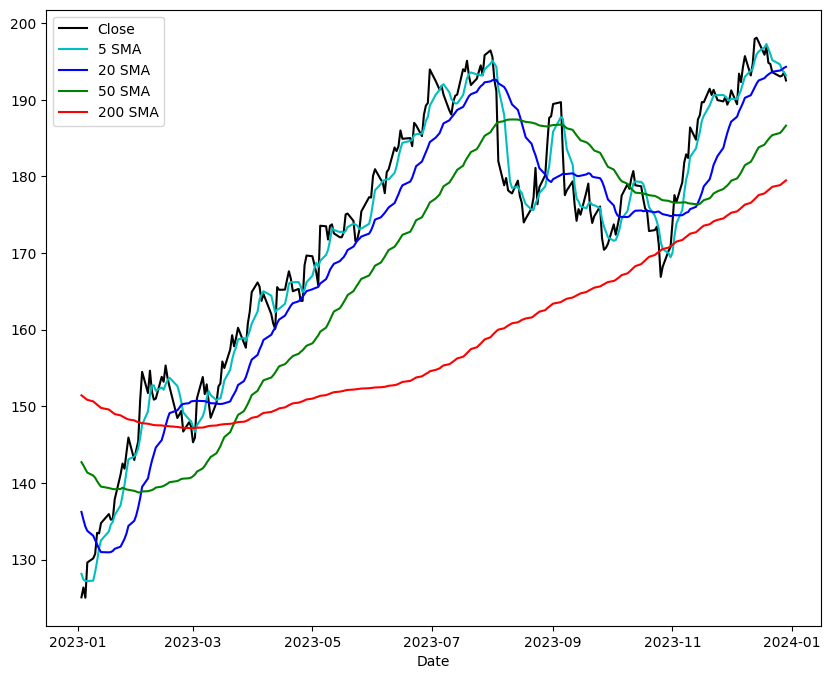

In [23]:
fig = plt.figure(figsize=(10, 8))
plt.plot(aapl['Date'], aapl['Close'], "k", label="Close")
plt.plot(aapl['Date'], aapl['5_SMA'], "c", label="5 SMA")
plt.plot(aapl['Date'], aapl['20_SMA'], "b", label="20 SMA")
plt.plot(aapl['Date'], aapl['50_SMA'], "g", label="50 SMA")
plt.plot(aapl['Date'], aapl['200_SMA'], "r", label="200 SMA")
plt.legend()
plt.xlabel('Date')
plt.show()

In [51]:
# test buy/sell labels
# Constrained linear regression
from scipy.optimize import minimize

length = 8
prices = np.array([5,20,10,3,4,5,5,5])
A = np.vstack([np.arange(length), np.ones(length)])
def loss(x):
    return np.sum(np.square(np.dot(x, A) - prices))
constraint = ({'type': 'eq', 'fun': lambda x: x[1] - prices[0]})
x0 = np.zeros(2)
res = minimize(loss, x0, method='SLSQP', constraints=constraint, options={'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 253.39285714293922
            Iterations: 4
            Function evaluations: 15
            Gradient evaluations: 4


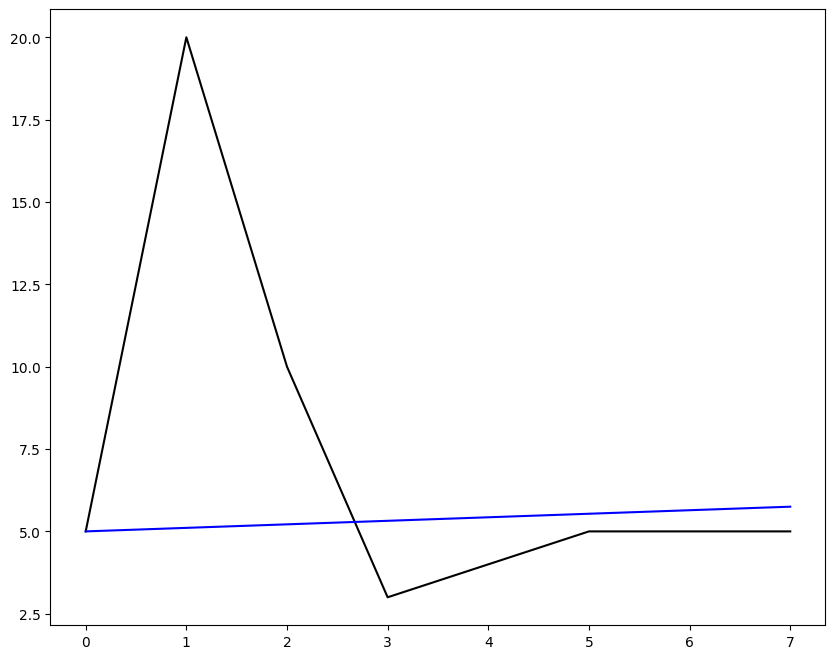

In [54]:
m, c = res.x
fig = plt.figure(figsize=(10, 8))
plt.plot(np.arange(length), prices, "k", label="Prices")
plt.plot(np.arange(length), m * np.arange(length) + c, "b", label="Constrained Best Fit Line")
plt.show()

In [77]:
def best_fit_line_through_today_price(today_price, next_prices):
    n = len(next_prices) + 1
    A = np.vstack([np.arange(n), np.ones(n)])
    def loss(x):
        return np.sum(np.square(np.dot(x, A) - np.concatenate([[today_price], next_prices])))
    constraint = ({'type': 'eq', 'fun': lambda x: x[1] - today_price})
    x0 = np.zeros(2)
    res = minimize(loss, x0, method='SLSQP', constraints=constraint)
    return res.x

In [110]:
length=30
labels=[]
for i in range(len(aapl['Close']) - length):
    today_price = aapl['Close'].iloc[i]
    next_prices = aapl['Close'].iloc[i+1 : i+1+length].to_numpy()
    m, c = best_fit_line_through_today_price(today_price, next_prices)
    if m <= -0.4:
        labels.append('Sell')
    elif -0.4 < m < 0.4:
        labels.append('Do Nothing')
    else:
        labels.append('Buy')
labels += length*['Do Nothing']
labels = np.array(labels)

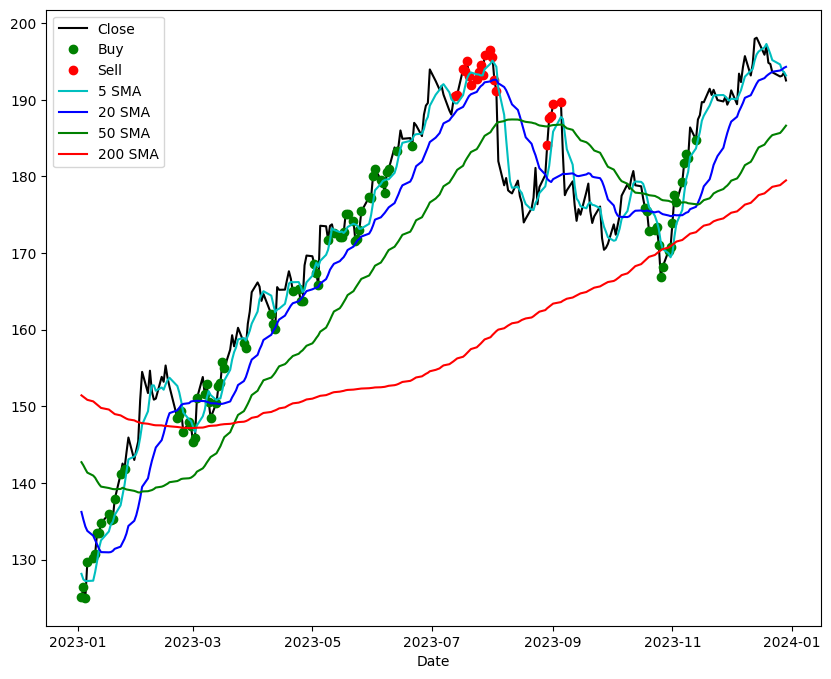

In [111]:
fig = plt.figure(figsize=(10, 8))
plt.plot(aapl['Date'], aapl['Close'], "k", label="Close")
plt.plot(aapl['Date'][labels == 'Buy'], aapl['Close'][labels == 'Buy'], "o", c='g', label="Buy")
plt.plot(aapl['Date'][labels == 'Sell'], aapl['Close'][labels == 'Sell'], "o", c='r', label="Sell")
plt.plot(aapl['Date'], aapl['5_SMA'], "c", label="5 SMA")
plt.plot(aapl['Date'], aapl['20_SMA'], "b", label="20 SMA")
plt.plot(aapl['Date'], aapl['50_SMA'], "g", label="50 SMA")
plt.plot(aapl['Date'], aapl['200_SMA'], "r", label="200 SMA")
plt.legend()
plt.xlabel('Date')
plt.show()